# Diagonalization of XZX model for systems of relative low size
This notebook checks if the ground state is degenerate for OBC and non-degenerate for PBC. It also calculates how the time scale with the size of the system for full matrix, sparse matrix and sparse block matrix.

In [1]:
import functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import block_diag
from numpy.linalg import eigh,eigvalsh
from scipy.sparse.linalg import eigsh
import time

## Simple exemples

#### Eigenvectors for different k subpaces

In [2]:
L = 6

In [13]:
eigs_k = []

for k in range(L):
    h = functions.build_HK(L,k,J=2)
    eigenvalues, _ = eigh(h)
    eigs_k.append((eigenvalues))

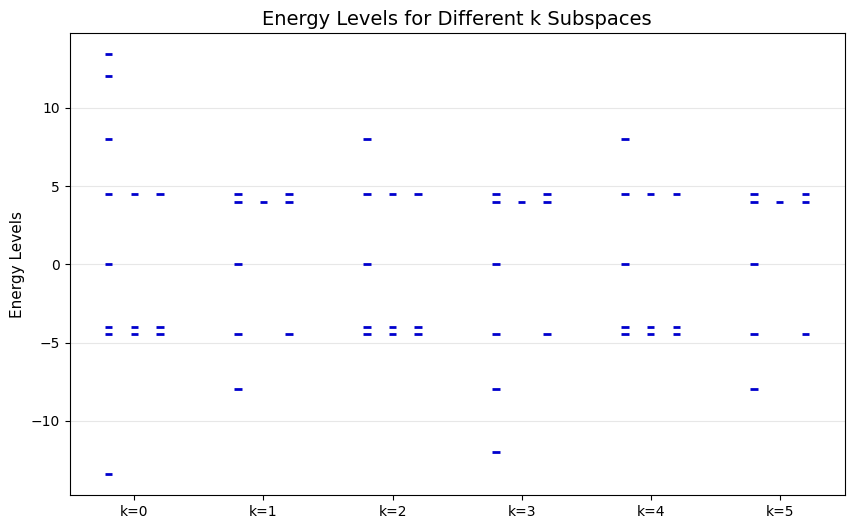

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for j, energies in enumerate(eigs_k):

    energy_levels, degeneracies = np.unique(np.round(energies, 8), return_counts=True)
    
    for i, (energy, degeneracy) in enumerate(zip(energy_levels, degeneracies)):
        x_positions = np.linspace(-0.2+j, 0.2+j, degeneracy)
        for x in x_positions:
            ax.hlines(energy, xmin=x-0.03, xmax=x+0.03, color='mediumblue', linewidth=2)

# Customizing the plot
ax.set_ylabel("Energy Levels", fontsize=11)
ax.set_xticks(np.arange(L),["k="+str(i) for i in range(L)])  
#ax.set_ylim(-L-1, L + 1) 
ax.grid(alpha=0.3,axis='y')  

# Display the plot
plt.title("Energy Levels for Different k Subspaces", fontsize=14)
plt.show()


### PBC

#### L = 10

In [ ]:
L = 10

In [101]:
J = [0, 0.5, 1, 2, 5, 10]
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigen.append(eigvalsh(h))

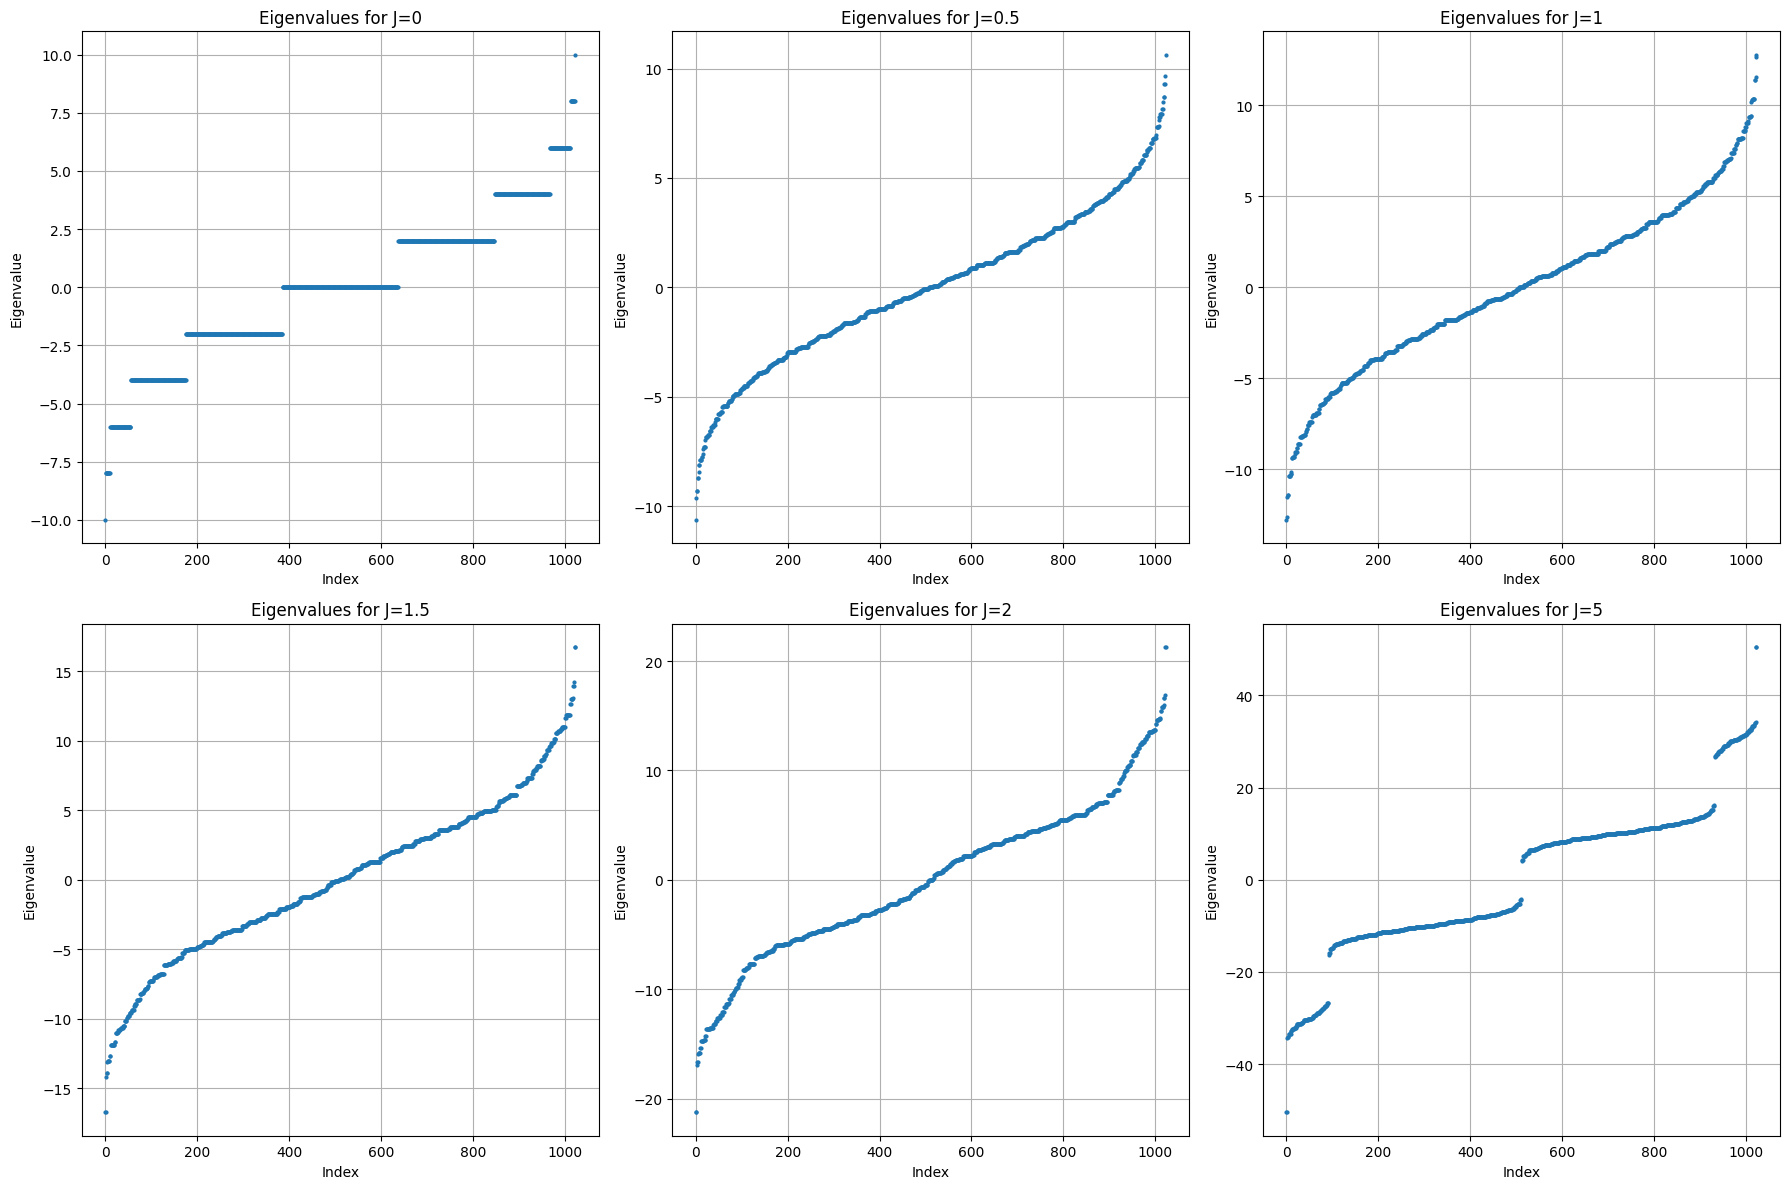

In [103]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

#### L = 9

In [2]:
L = 9

In [ ]:
J = [0, 0.5, 1, 2, 5, 10]
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigen.append(eigvalsh(h))

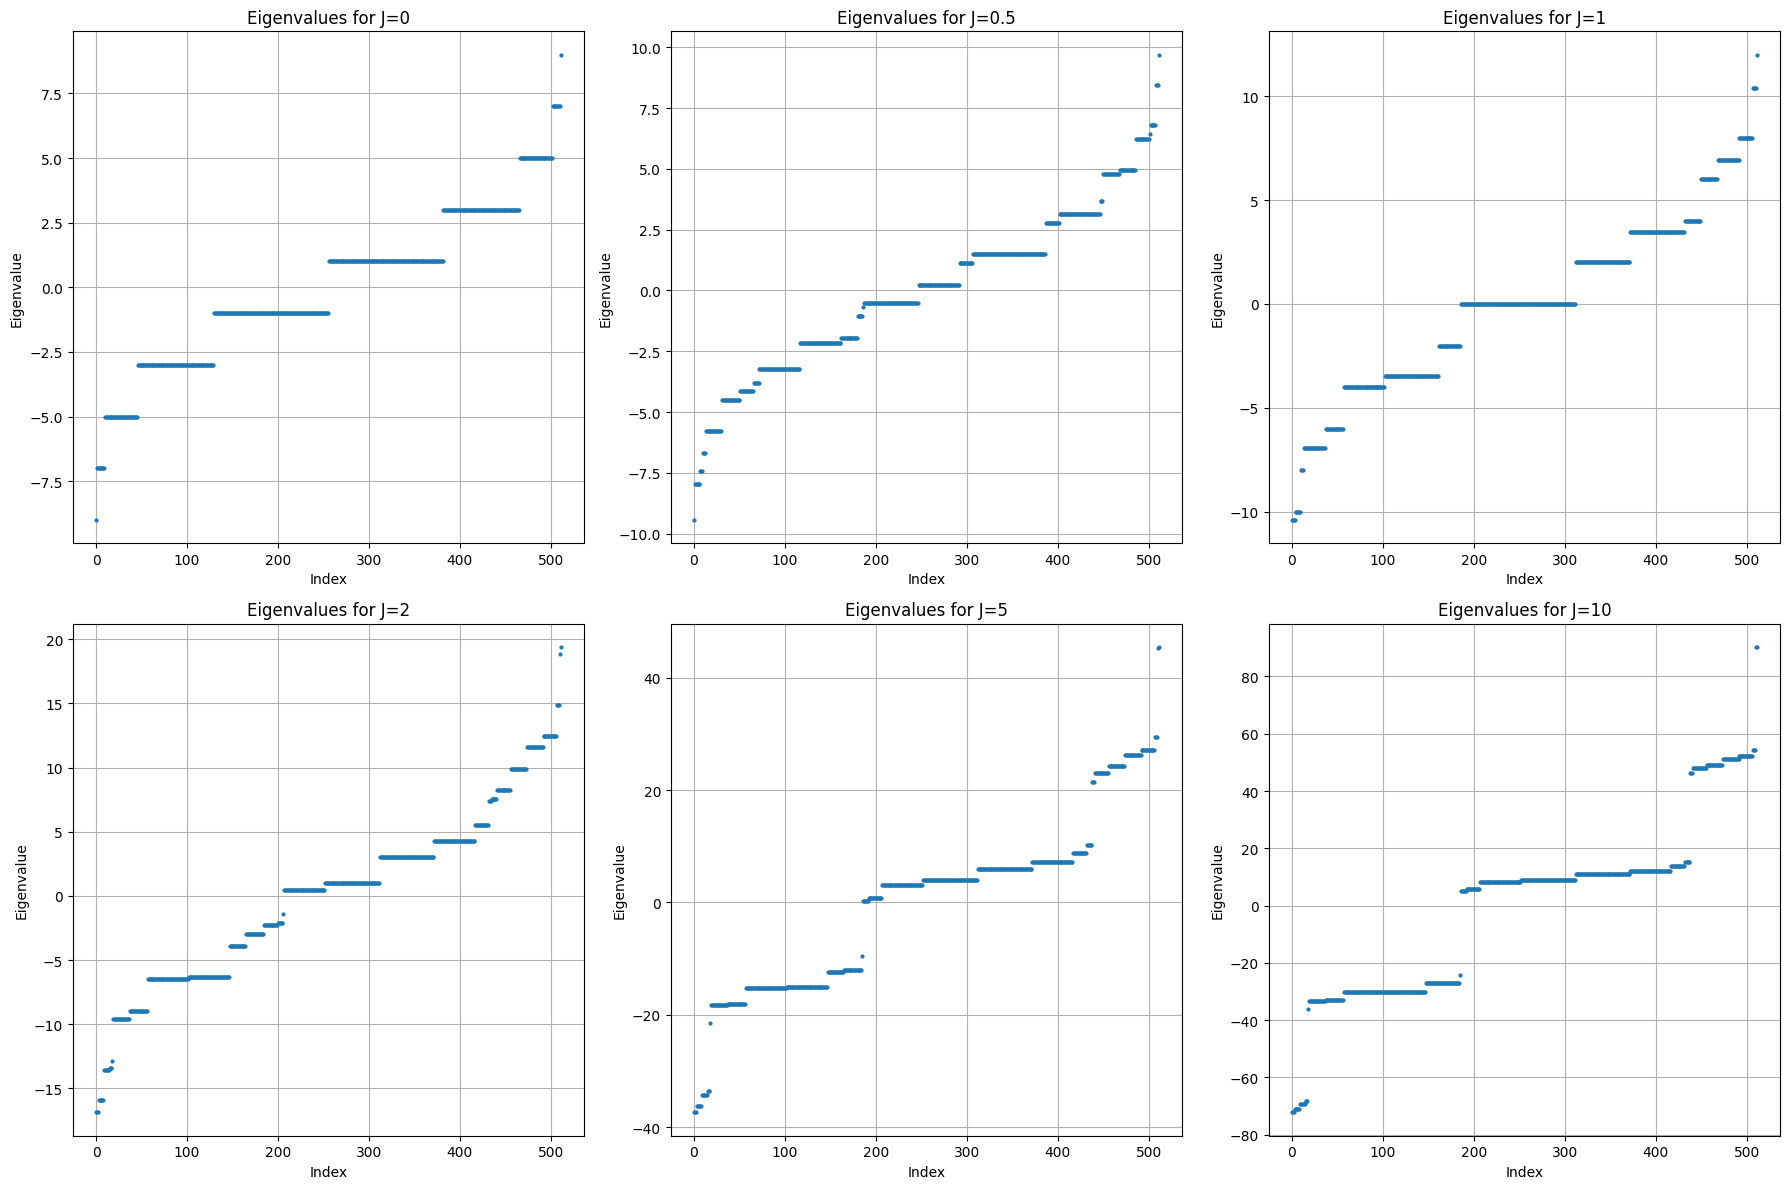

In [4]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

### OBC

#### L = 10

In [7]:
L = 10

In [8]:
J = [0, 0.5, 1, 2, 5, 10]
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=False,J=j)
    eigen.append(eigvalsh(h))

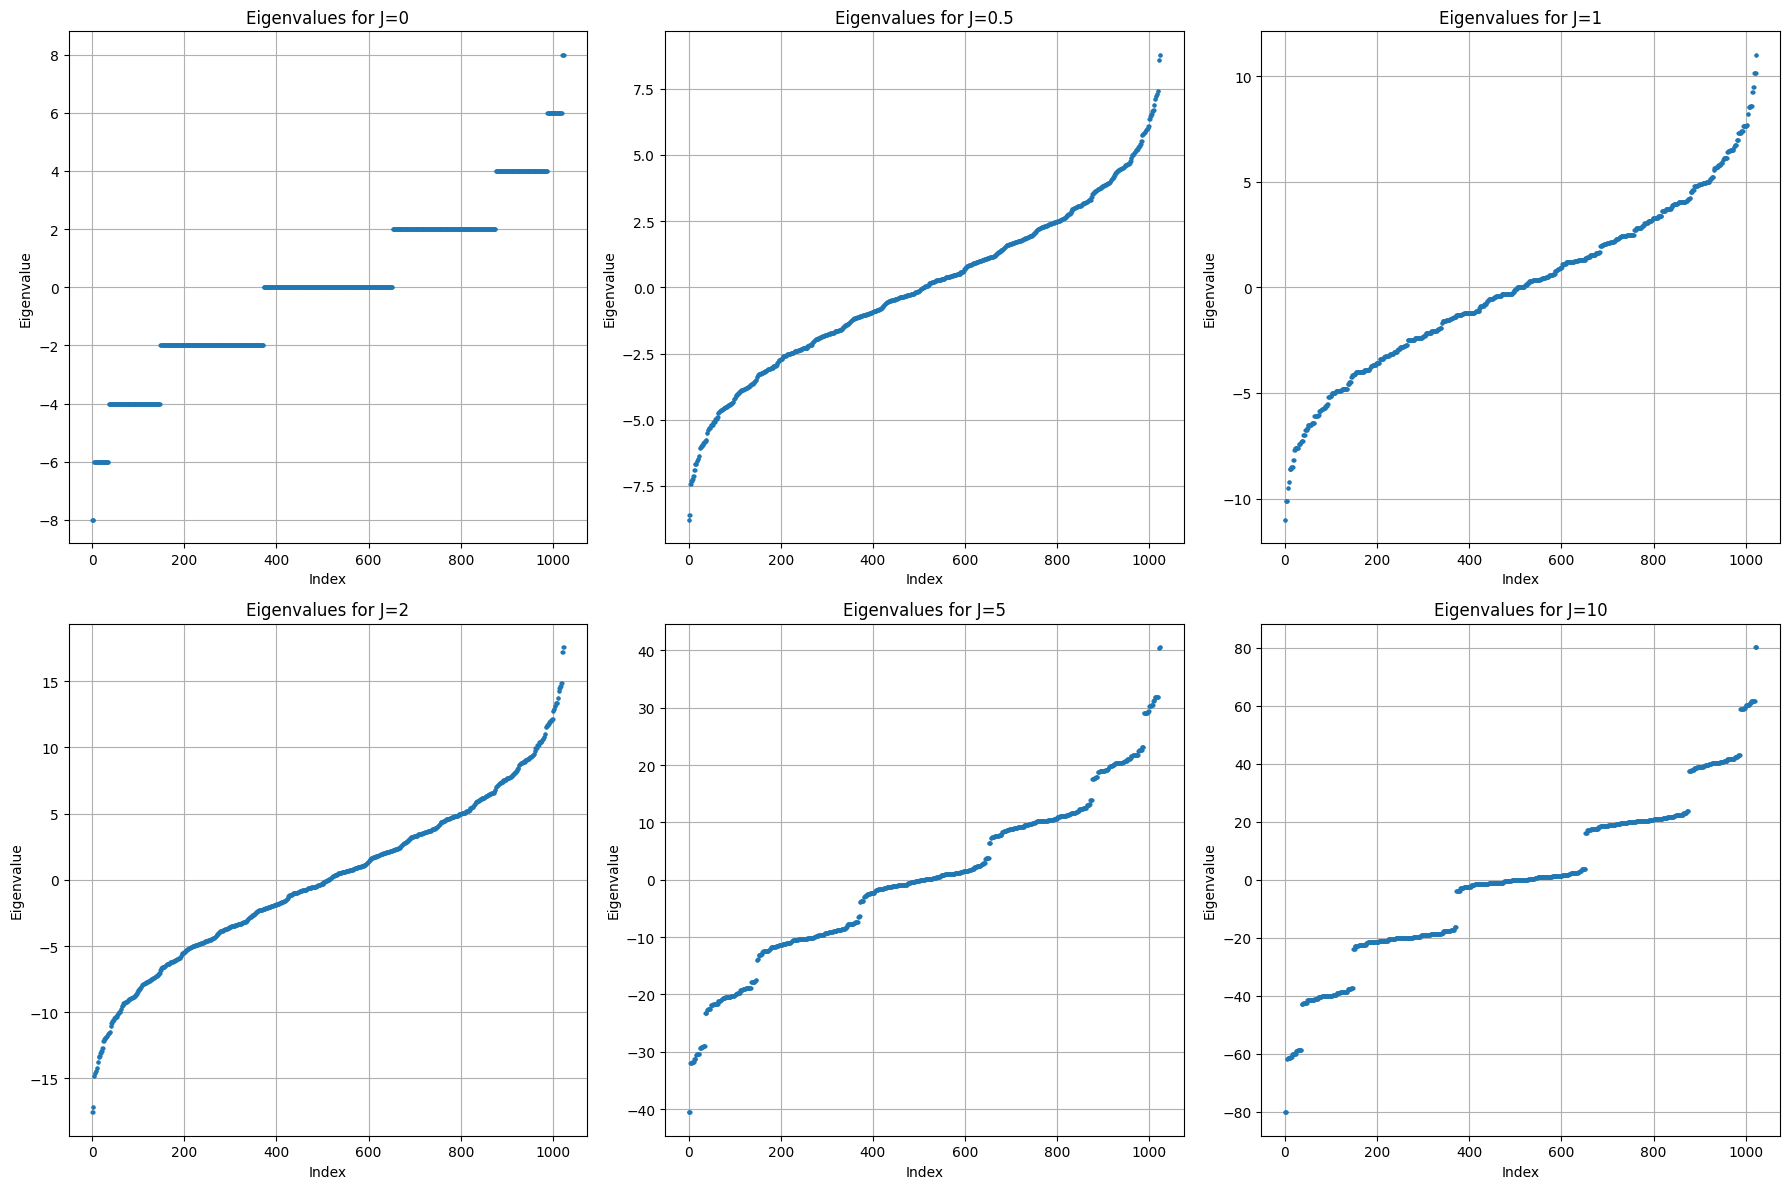

In [9]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

#### L = 9

In [10]:
L = 9

In [11]:
J = [0, 0.5, 1, 2, 5, 10]
eigen = []

for j in J:
    h = functions.build_fullH(L,pbc=False,J=j)
    eigen.append(eigvalsh(h))

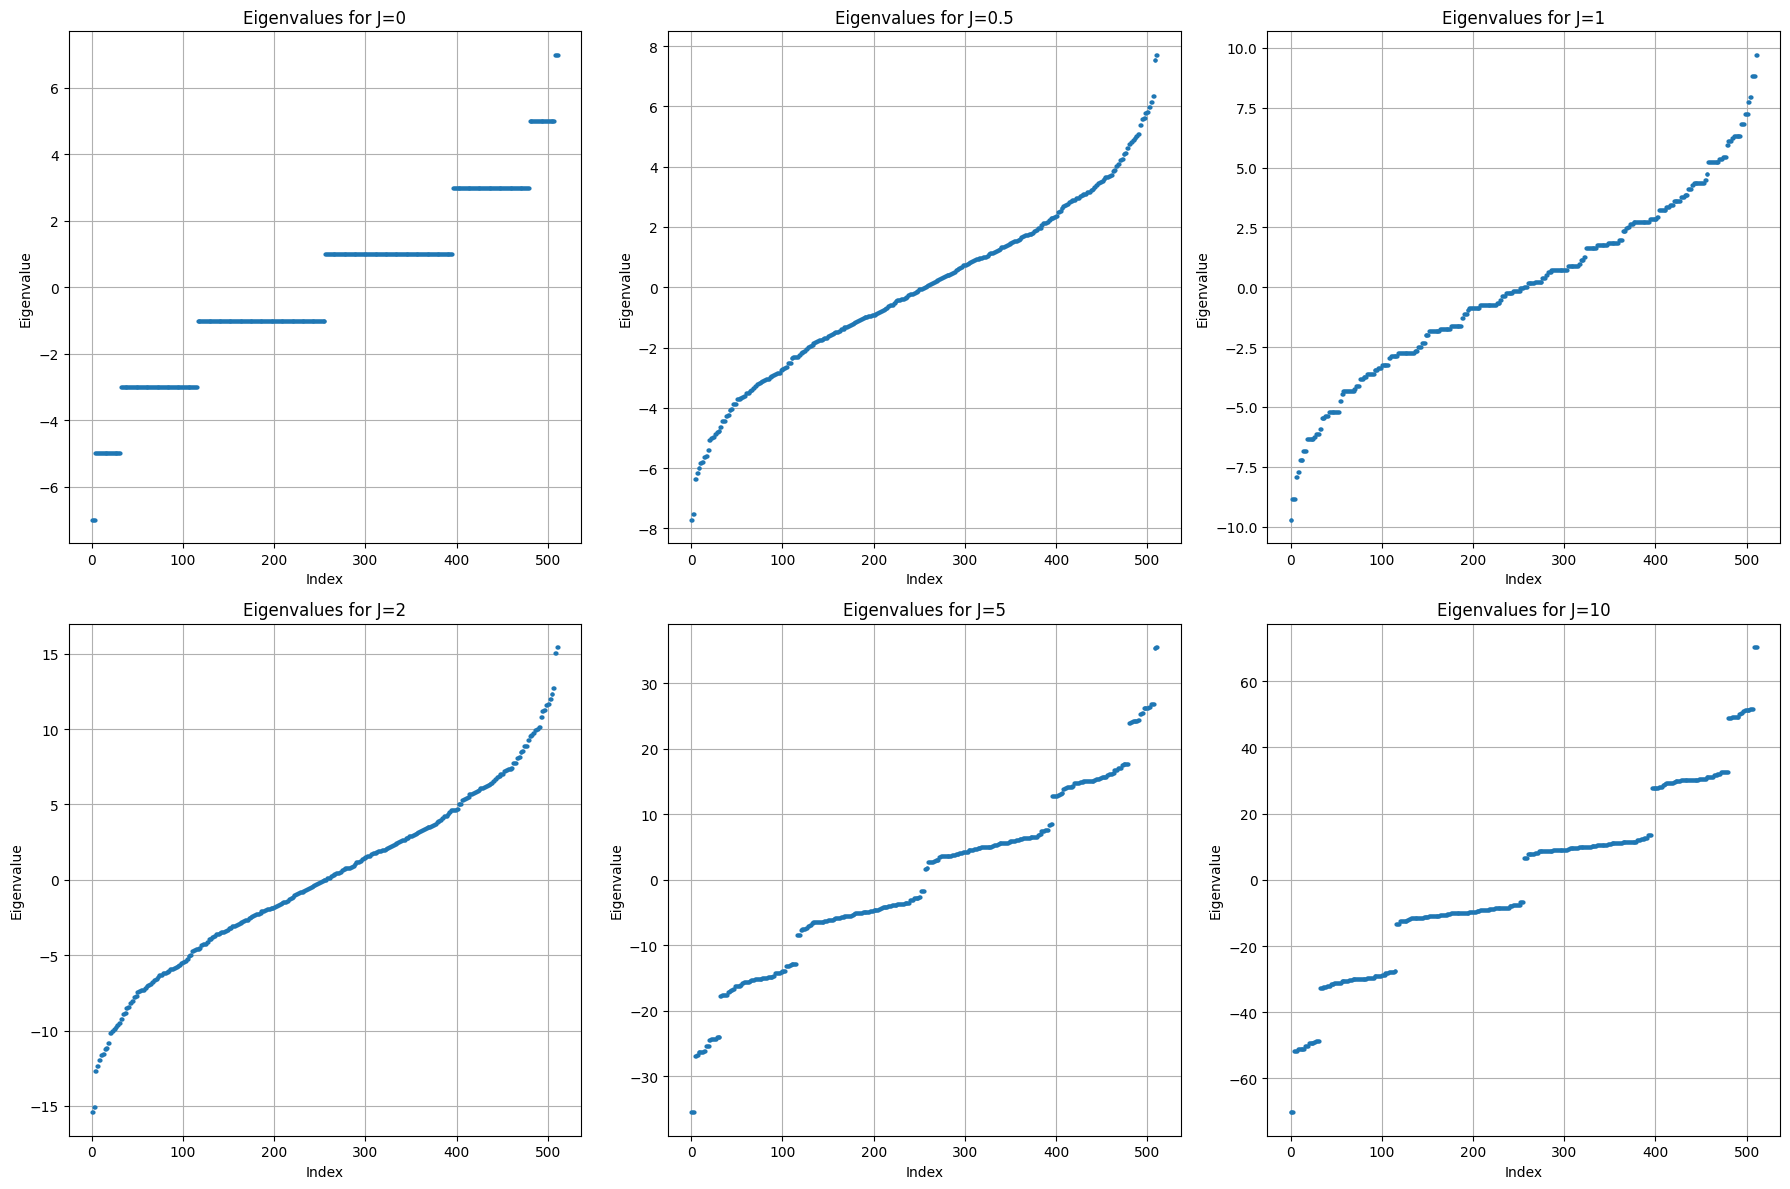

In [12]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each set of eigenvalues in a separate subplot
for i, ax in enumerate(axs):
    if i < len(eigen):
        ax.plot(eigen[i], 'o', markersize=2)
        ax.set_title(f'Eigenvalues for J={J[i]}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Eigenvalue')
        ax.grid(True)
    else:
        fig.delaxes(ax)  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

## Magnetization

In [111]:
L=10

In [112]:
def magnetization(L, psi):
    mag = 0
    for state,coeff in enumerate(psi):
        mag_i = 0
        for i in range(L):
            mag_i += (2 * (state & 2**i)/2**i - 1)
        #print(mag_i)
        mag += coeff**2 * mag_i
    return mag

In [113]:
J = np.linspace(0,2,100)
magnetization_values = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigenvalues, eigenvectors = eigsh(h, k=1, which='SA')
    magnetization_values.append(magnetization(L, eigenvectors[:,0]))

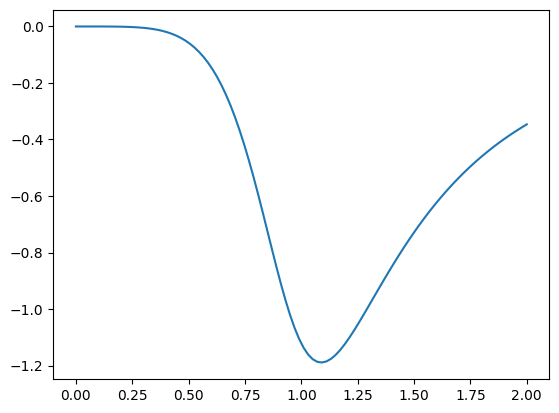

In [114]:
plt.plot(J,magnetization_values)
plt.show()

## Energy Gap

In [15]:
L=10

In [17]:
J = np.linspace(0,2,30)
gaps = []

for j in J:
    h = functions.build_fullH(L,pbc=True,J=j)
    eigenvalues, eigenvectors = eigh(h)#, k=1, which='SA')
    gaps.append(eigenvalues[0]-eigenvalues[1])

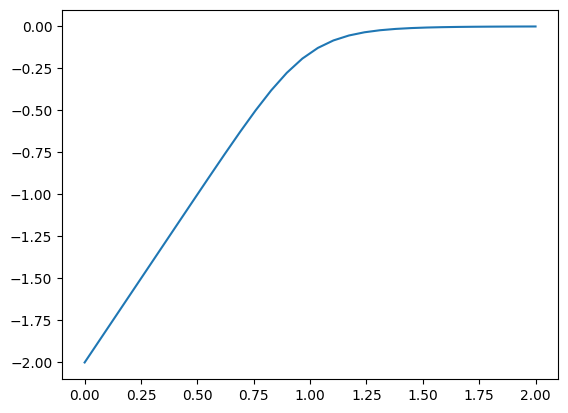

In [19]:
plt.plot(J,gaps)
plt.show()

* calcolo andamento del gap con diverse size
* cambiare segno davanti a xzx per controllare il grafico della magnetizzazione 
* fare tutto con L pari
